[[ 0.  1.  1.]
 [ 1.  0.  1.]
 [ 0. -1.  1.]
 [-1.  0.  1.]]
[[2. 4. 1.]
 [4. 2. 1.]
 [2. 0. 1.]
 [0. 2. 1.]]


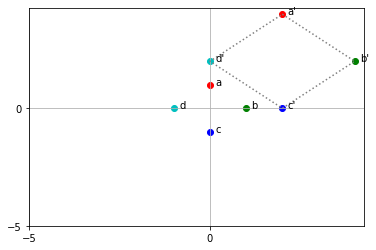

In [1]:

%matplotlib inline 


import matplotlib.pyplot as plt
import numpy as np
import string

fig = plt.figure()
ax = plt.gca()
color_lut = 'rgbc'
xs, ys, xs_s, ys_s = [], [], [], []

# Pad and unpack the transformation matrix to be 3x1 or 3x3,
# necessary for it to handle both rotation and translation
pad = lambda x: np.hstack([x, np.ones((x.shape[0], 1))])
unpad = lambda x: x[:, :-1]

# matrix with row vectors of points
A = np.array([(0, 1), 
              (1, 0), 
              (0, -1), 
              (-1, 0)])

##
## See https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/
## For a good description of the parts of the matrix

# create the scaling transformation matrix
# Don't know why it has to be transposed
T = np.array([[2, 0, 2], 
              [0, 2, 2], 
              [0, 0, 1]]).T

O = pad(A) @ T 
O = np.dot(pad(A), T)
#O = np.matmul(pad(A), T)

print(pad(A))
print(O)

O = unpad(O)

for i, (row, output_row) in enumerate(zip(A, O)):

    x, y  = row
    plt.scatter(x, y, color=color_lut[i])
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    
    x_s, y_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    plt.scatter(x_s, y_s, color=color_lut[i])
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i)]}'")
    

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-5, 3, 5))
ax.set_yticks(np.arange(-5, 3, 5))
plt.grid()
plt.show()